In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#data = keras.datasets.fashion_mnist

#(train_images, train_labels), (test_images, test_labels) = data.load_data()

print(tf.__version__)

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
batch_size = 32
img_height = 28
img_width = 28
# train_ds and val_ds are what we prepare for CNN model
data_dir = "/home/tom/.keras/datasets/flower"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

pre_ds= tf.keras.preprocessing.image_dataset_from_directory(
  "/home/tom/.keras/datasets/predict",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

from tensorflow.keras import layers

#normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (x, y))
train_images, train_labels = next(iter(normalized_ds))

normalized_ds = test_ds.map(lambda x, y: (x, y))
test_images, test_labels = next(iter(normalized_ds))

normalized_ds = pre_ds.map(lambda x, y: (x, y))
pre_images, pre_labels = next(iter(normalized_ds))


2.3.0
Found 290 files belonging to 2 classes.
Using 232 files for training.
Found 290 files belonging to 2 classes.
Using 58 files for validation.
Found 86 files belonging to 2 classes.
Using 69 files for training.


In [12]:
train_images = train_images/255.0
test_images = test_images/255.0
pre_images = pre_images/255.0



In [13]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Flatten(),
    #keras.layers.Conv2D(32, 3, activation='relu'),
    #keras.layers.MaxPooling2D(),
    keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5) 
#epochs means the time(order) will repeat
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc:", test_acc)



Epoch 1/5
1/1 [==============================] - 0s 971us/step - loss: 2.0371 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 792us/step - loss: 0.7210 - accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 730us/step - loss: 0.1735 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 664us/step - loss: 0.0563 - accuracy: 1.0000
Tested Acc: 1.0


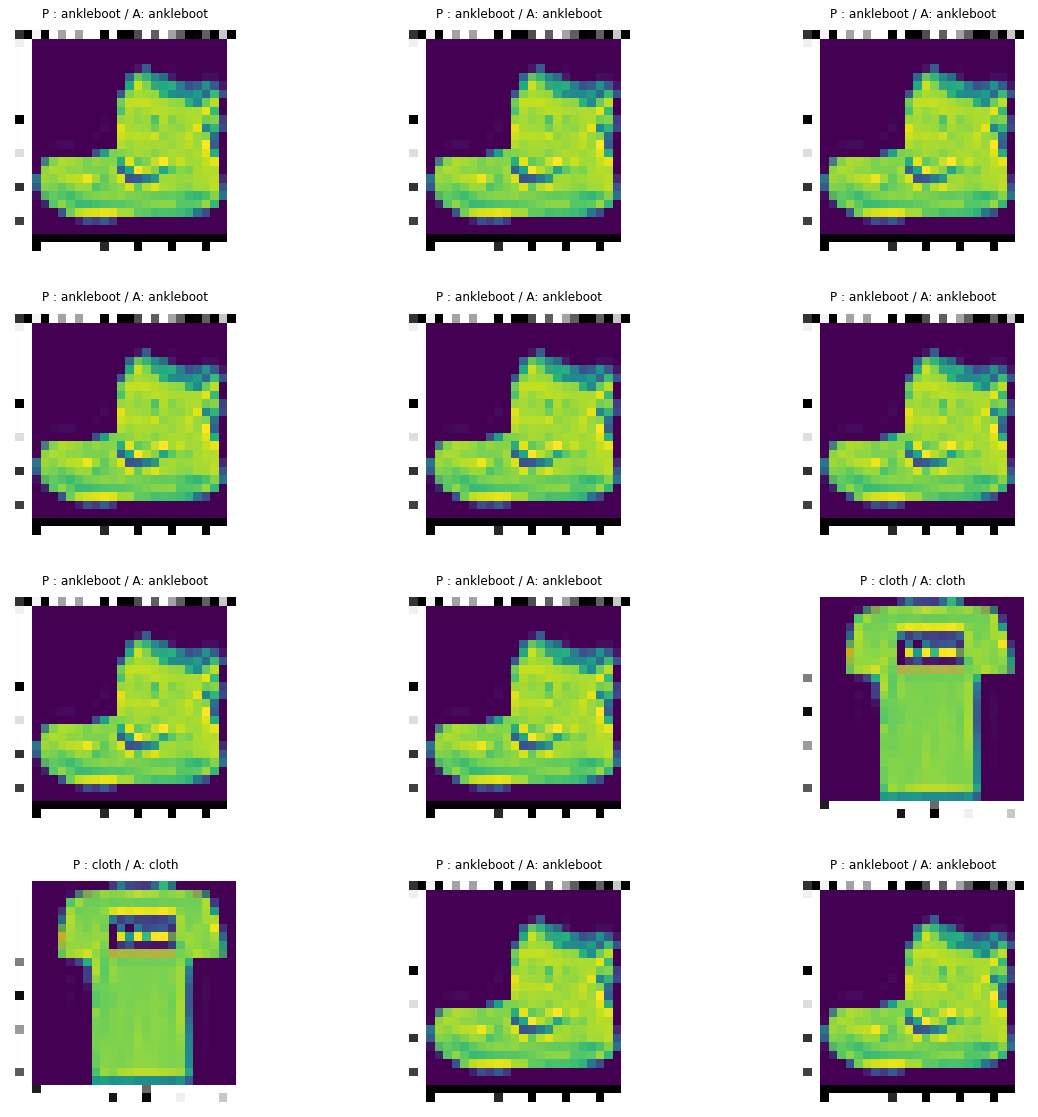

In [22]:
class_names = test_ds.class_names
prediction = model.predict(test_images)
plt.figure(figsize=(20, 20))
for i in range(12):
    plt.grid(False)
    ax=plt.subplot(4, 3, i+1)
    plt.imshow(test_images[i]) #, cmap=plt.cm.binary)
    #plt.xlabel("Actual: " + class_names[pre_labels[i]])
    plt.title("P : " + class_names[np.argmax(prediction[i])] + " / A: " + class_names[test_labels[i]])
    plt.axis("off")
    #plt.show()

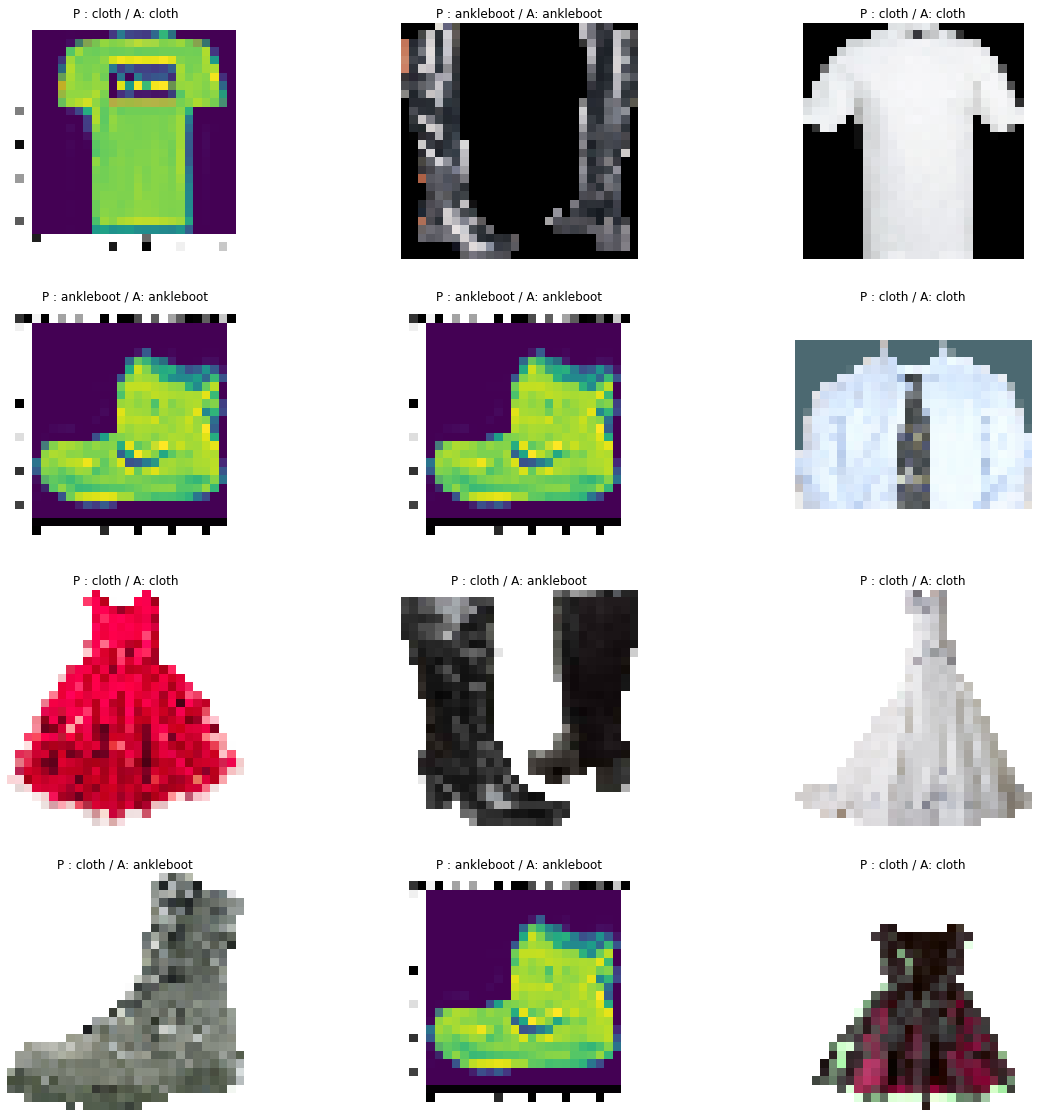

In [24]:
class_names = pre_ds.class_names
prediction = model.predict(pre_images)
plt.figure(figsize=(20, 20))
for i in range(12):
    plt.grid(False)
    ax=plt.subplot(4, 3, i+1)
    plt.imshow(pre_images[i]) #, cmap=plt.cm.binary)
    #plt.xlabel("Actual: " + class_names[pre_labels[i]])
    plt.title("P : " + class_names[np.argmax(prediction[i])] + " / A: " + class_names[pre_labels[i]])
    plt.axis("off")
    #plt.show()

In [25]:
print(train_images[1])

tf.Tensor(
[[[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  ...
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

 [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.9642831e-01 1.9642831e-01 1.9642831e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [7.8188199e-01 7.8188199e-01 7.8188199e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

 [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [9.4260067e-01 9.4260067e-01 9.4260067e-01]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  ...
  [2.6666668e-01 3.9215689e-03 3.2941177e-01]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]]

 ...

 [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.000000